In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from math import pi
from Network import RingNetwork, SimpleMixedNetwork, MixedNetwork

%matplotlib inline

In [2]:
def plot_output(input, input_c, indices_c, alphas, f):
    alphas = np.tile(alphas, (50,1))
    T = input.size
    
    fig = plt.figure(1)
    gridspec.GridSpec(1, 9)
    
    plt.subplot2grid((1,9), (0,0), colspan=4)
    plt.plot(input, -np.arange(T))
    plt.yticks(
        np.arange(0, -T, -100), np.arange(0, T, 100)
        )
    plt.ylabel("Timestep")
    plt.xticks(
        [0, pi, 2*pi], ["0", "Pi", "2Pi"]
        )
    plt.xlabel("Theta")
    plt.title("Location\n")

    plt.subplot2grid((1,9), (0,4))
    plt.imshow(alphas.T, aspect='auto')
    plt.yticks([])
    plt.xticks([])
    plt.title("Input\nStrength")
    
    plt.subplot2grid((1,9), (0,5), colspan=4)
    plt.imshow(f.T, aspect='auto')
    plt.yticks([])
    plt.xticks(
        [0, f.shape[0]//2, f.shape[0] - 1], ["0", "Pi", "2Pi"]
        )
    plt.xlabel("Theta")
    plt.title("Firing Rate\n")
    
    fig.tight_layout()
    fig.set_size_inches(w=5, h=8)

In [3]:
def plot_output(locations, alphas, f):
    alphas = np.tile(alphas, (50,1))
    T = locations.size
    
    fig = plt.figure(1)
    gridspec.GridSpec(1, 9)
    
    plt.subplot2grid((1,9), (0,0), colspan=4)
    plt.plot(locations, -np.arange(T))
    plt.yticks(
        np.arange(0, -T, -100), np.arange(0, T, 100)
        )
    plt.ylabel("Timestep")
    plt.xticks(
        [0, pi, 2*pi], ["0", "Pi", "2Pi"]
        )
    plt.xlabel("Theta")
    plt.title("Location\n")

    plt.subplot2grid((1,9), (0,4))
    plt.imshow(alphas.T, aspect='auto')
    plt.yticks([])
    plt.xticks([])
    plt.title("Input\nStrength")
    
    plt.subplot2grid((1,9), (0,5), colspan=4)
    norm = mcolors.DivergingNorm(vmin=f.min(), vmax = f.max(), vcenter=0)
    plt.imshow(f.T, cmap=plt.cm.coolwarm, norm=norm, aspect='auto')
    plt.yticks([])
    plt.xticks(
        [0, f.shape[0]//2, f.shape[0] - 1], ["0", "Pi", "2Pi"]
        )
    plt.xlabel("Theta")
    plt.title("Firing Rate\n")
    plt.colorbar()
    
    fig.tight_layout()
    fig.set_size_inches(w=5, h=8)

## A classic ring network

In [4]:
network = RingNetwork(100)
num_steps = 500
input = np.concatenate([
    np.linspace(0, 2*pi, num_steps//4),
    np.linspace(2*pi, 0, num_steps//4),
    np.linspace(0, 2*pi, num_steps//4),
    np.linspace(2*pi, 0, num_steps//4)
    ])
alphas = np.ones(input.size)*0.6
m, f = network.simulate(input, alphas)

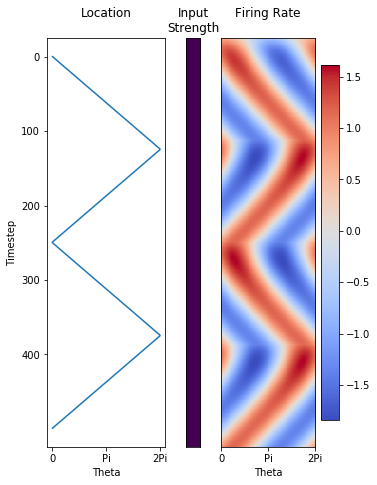

In [5]:
plot_output(input, alphas, f)

## A ring network with singular context-ring synapses

In [6]:
N = 100
N_c = 1
C = 0.5
indices_c = np.array([N//2])
network = SimpleMixedNetwork(N, N_c, C, indices_c)
num_steps = 1000
input = np.concatenate([
    np.linspace(0, 2*pi, num_steps//4),
    np.linspace(2*pi, 0, num_steps//4),
    np.linspace(0, 0, num_steps//4),
    np.linspace(0, 0, num_steps//4)
    ])
alphas = np.ones(input.size)*0.6
input_c = np.zeros((input.size, N_c))
input[500:,] = 0
alphas[500:,] = 0
input_c[650:800, -1] = 1
m, f, dmdt = network.simulate(input, input_c, alphas)

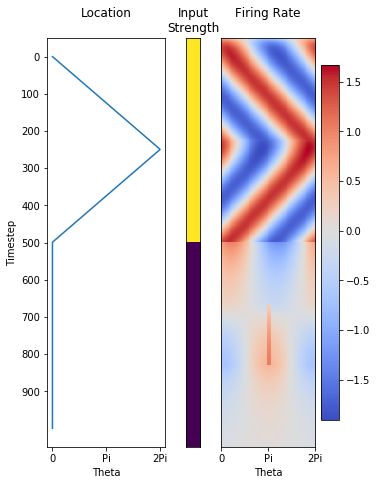

In [7]:
plot_output(input, alphas, f)

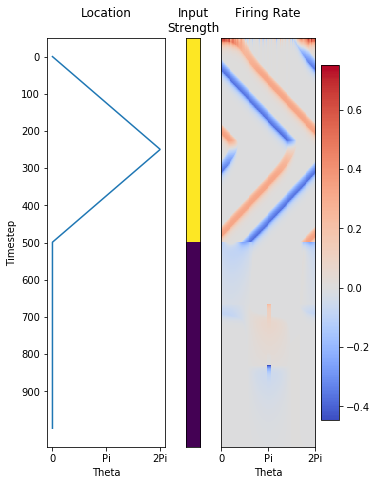

In [8]:
plot_output(input, alphas, dmdt)

## A ring network with expanding context-ring synapses

In [16]:
N = 100
N_c = 2
C = 0.05
N_cr = 15
J_cr = 0.02
target_indices = np.array([N//2, 0])
np.random.seed(0)
network = MixedNetwork(N, N_c, C, N_cr, J_cr, target_indices)
# network.ring_indices= np.array([97])
# network._init_J()
num_steps = 1000
input = np.concatenate([
    np.linspace(0, 2*pi, num_steps//4),
    np.linspace(2*pi, 0, num_steps//4),
    np.linspace(0, 0, num_steps//4),
    np.linspace(0, 0, num_steps//4)
    ])
alphas = np.ones(input.size)*0.6
input_c = np.zeros((input.size, N_c))
alphas[500:,] = 0
input_c[650:800, 0] = 1
input_c[850:, 1] = 1
m, f, dmdt = network.simulate(input, input_c, alphas)

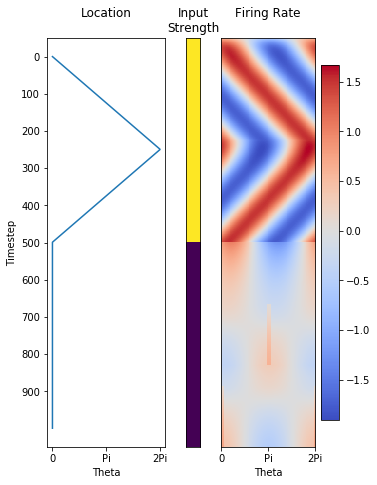

In [17]:
plot_output(input, alphas, f)

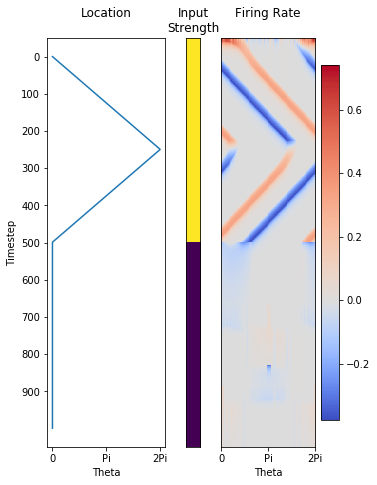

In [18]:
plot_output(input, alphas, dmdt)

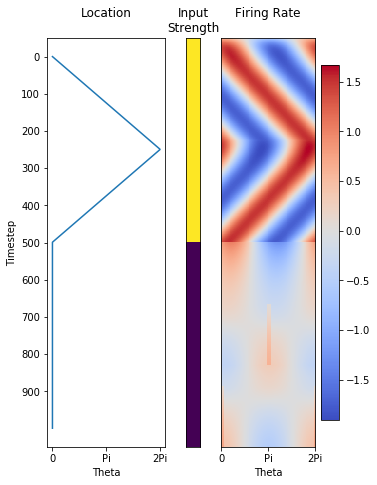

In [19]:
plot_output(input, alphas, f)

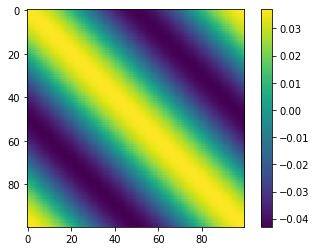

In [20]:
plt.imshow(network.J)
plt.colorbar()